In [17]:
%matplotlib inline

import pandas as pd
import numpy as np
import os
from functools import reduce
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import statsmodels.api as sm
from pylab import rcParams
from matplotlib.backends.backend_agg import FigureCanvasAgg
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV, KFold

plt.style.use('seaborn-darkgrid')

In [18]:
def classify(num, avg):
    if num > avg:
        return 1
    elif num < avg:
        return 0
    
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

In [19]:
COVID_DF = pd.read_csv('COVID_AllData.csv', index_col = 0)
COVID_DF.head()

,State,cases,deaths,AGI Total,AGI Top 1 Percent,AGI Top 5 Percent,AGI Top 10 Percent,AGI Top 25 Percent,AGI Top 50 Percent,AGI Top 75 Percent,...,School Expenditures per Student Enrollment(Percent),Public School Salary 2018(Dollars),Employer Sponsored Insurance Premium Costs (Single Coverage),Employer Sponsored Insurance Premium Costs (Family Coverage),Employee Contribution to Premium Costs (Single Coverage),Employee Contribution to Premium Costs (Family Coverage),Employee Contribution to Premium Costs (Combined Average),Employee Deductible Costs (Single Coverage),Employee Deductible Costs (Combined Average),Total Potential Out-of-Pocket Costs (Employee Contribution + Deductible)
0,Alabama,387786,14345,119662909,18553159,35924229,49537638,76667112,101687773,114405941,...,9257.567670,50568.0,6089,18001,1453,5278,4260,1569,2563,6824
1,Alaska,18316,367,23969001,2848087,6184956,8915998,14554105,20064361,22927860,...,17509.922477,69682.0,8432,21648,1154,4501,3695,1797,2881,6576
2,Arizona,426614,18857,197753744,33609317,63073164,85351788,128616004,168531690,189378565,...,7710.878778,48723.0,6229,18875,1554,5786,4834,2166,3530,8364
3,Arkansas,161569,3301,74634888,16319991,26475276,34256878,49689104,64088761,71584342,...,9900.217828,50544.0,5974,17995,1375,5728,4661,1501,2741,7403
4,California,2664110,102387,1549284943,356240355,600859502,772738760,1086299917,1360947743,1497300869,...,11419.376126,80680.0,6542,19567,1202,5376,4127,1680,2767,6894


In [20]:
COVID_DF = COVID_DF.drop(columns = ['cases', 'deaths'])
COVID_DF.head()

,State,AGI Total,AGI Top 1 Percent,AGI Top 5 Percent,AGI Top 10 Percent,AGI Top 25 Percent,AGI Top 50 Percent,AGI Top 75 Percent,Total Population,Total population_Male,...,School Expenditures per Student Enrollment(Percent),Public School Salary 2018(Dollars),Employer Sponsored Insurance Premium Costs (Single Coverage),Employer Sponsored Insurance Premium Costs (Family Coverage),Employee Contribution to Premium Costs (Single Coverage),Employee Contribution to Premium Costs (Family Coverage),Employee Contribution to Premium Costs (Combined Average),Employee Deductible Costs (Single Coverage),Employee Deductible Costs (Combined Average),Total Potential Out-of-Pocket Costs (Employee Contribution + Deductible)
0,Alabama,119662909,18553159,35924229,49537638,76667112,101687773,114405941,4887871,2369271,...,9257.567670,50568.0,6089,18001,1453,5278,4260,1569,2563,6824
1,Alaska,23969001,2848087,6184956,8915998,14554105,20064361,22927860,737438,382952,...,17509.922477,69682.0,8432,21648,1154,4501,3695,1797,2881,6576
2,Arizona,197753744,33609317,63073164,85351788,128616004,168531690,189378565,7171646,3565129,...,7710.878778,48723.0,6229,18875,1554,5786,4834,2166,3530,8364
3,Arkansas,74634888,16319991,26475276,34256878,49689104,64088761,71584342,3013825,1476680,...,9900.217828,50544.0,5974,17995,1375,5728,4661,1501,2741,7403
4,California,1549284943,356240355,600859502,772738760,1086299917,1360947743,1497300869,39557045,19673553,...,11419.376126,80680.0,6542,19567,1202,5376,4127,1680,2767,6894


In [21]:
COVID_Case = pd.read_csv('COVID.csv', index_col = 0)
COVID_Case.head()

,State,cases,deaths
0,Alabama,59067,1211
1,Alaska,1954,15
2,Arizona,131411,2442
3,Arkansas,30297,335
4,California,355497,7368


In [22]:
COVID_DF = pd.merge(COVID_DF, COVID_Case, how = 'left', on = 'State')
COVID_DF.head()

,State,AGI Total,AGI Top 1 Percent,AGI Top 5 Percent,AGI Top 10 Percent,AGI Top 25 Percent,AGI Top 50 Percent,AGI Top 75 Percent,Total Population,Total population_Male,...,Employer Sponsored Insurance Premium Costs (Single Coverage),Employer Sponsored Insurance Premium Costs (Family Coverage),Employee Contribution to Premium Costs (Single Coverage),Employee Contribution to Premium Costs (Family Coverage),Employee Contribution to Premium Costs (Combined Average),Employee Deductible Costs (Single Coverage),Employee Deductible Costs (Combined Average),Total Potential Out-of-Pocket Costs (Employee Contribution + Deductible),cases,deaths
0,Alabama,119662909,18553159,35924229,49537638,76667112,101687773,114405941,4887871,2369271,...,6089,18001,1453,5278,4260,1569,2563,6824,59067,1211
1,Alaska,23969001,2848087,6184956,8915998,14554105,20064361,22927860,737438,382952,...,8432,21648,1154,4501,3695,1797,2881,6576,1954,15
2,Arizona,197753744,33609317,63073164,85351788,128616004,168531690,189378565,7171646,3565129,...,6229,18875,1554,5786,4834,2166,3530,8364,131411,2442
3,Arkansas,74634888,16319991,26475276,34256878,49689104,64088761,71584342,3013825,1476680,...,5974,17995,1375,5728,4661,1501,2741,7403,30297,335
4,California,1549284943,356240355,600859502,772738760,1086299917,1360947743,1497300869,39557045,19673553,...,6542,19567,1202,5376,4127,1680,2767,6894,355497,7368


In [23]:
COVID_DF = COVID_DF.rename(columns = {'Total population_HISPANIC OR LATINO':'Hispanic or Latino',
                                     'Total population_male':'Male Population',
                                     'Total population_female':'Female Population',
                                     'All Occupation 2018':'Total Occupations 2018'})
COVID_DF = COVID_DF.drop(columns = ['RACE_Total population', 'Percent of Labor Force w/ Bachelor 2018'])
COVID_DF.head()

,State,AGI Total,AGI Top 1 Percent,AGI Top 5 Percent,AGI Top 10 Percent,AGI Top 25 Percent,AGI Top 50 Percent,AGI Top 75 Percent,Total Population,Total population_Male,...,Employer Sponsored Insurance Premium Costs (Single Coverage),Employer Sponsored Insurance Premium Costs (Family Coverage),Employee Contribution to Premium Costs (Single Coverage),Employee Contribution to Premium Costs (Family Coverage),Employee Contribution to Premium Costs (Combined Average),Employee Deductible Costs (Single Coverage),Employee Deductible Costs (Combined Average),Total Potential Out-of-Pocket Costs (Employee Contribution + Deductible),cases,deaths
0,Alabama,119662909,18553159,35924229,49537638,76667112,101687773,114405941,4887871,2369271,...,6089,18001,1453,5278,4260,1569,2563,6824,59067,1211
1,Alaska,23969001,2848087,6184956,8915998,14554105,20064361,22927860,737438,382952,...,8432,21648,1154,4501,3695,1797,2881,6576,1954,15
2,Arizona,197753744,33609317,63073164,85351788,128616004,168531690,189378565,7171646,3565129,...,6229,18875,1554,5786,4834,2166,3530,8364,131411,2442
3,Arkansas,74634888,16319991,26475276,34256878,49689104,64088761,71584342,3013825,1476680,...,5974,17995,1375,5728,4661,1501,2741,7403,30297,335
4,California,1549284943,356240355,600859502,772738760,1086299917,1360947743,1497300869,39557045,19673553,...,6542,19567,1202,5376,4127,1680,2767,6894,355497,7368


In [24]:
COVID_DF['Hispanic or Latino'] = (COVID_DF['Total Population'])-(COVID_DF['White'] + COVID_DF['Black or African American'] + 
                                                     COVID_DF['American Indian and Alaska Native'] + COVID_DF['Asian'] + 
                                                     COVID_DF['Native Hawaiian and Other Pacific Islander'])

COVID_DF.head()

,State,AGI Total,AGI Top 1 Percent,AGI Top 5 Percent,AGI Top 10 Percent,AGI Top 25 Percent,AGI Top 50 Percent,AGI Top 75 Percent,Total Population,Total population_Male,...,Employer Sponsored Insurance Premium Costs (Single Coverage),Employer Sponsored Insurance Premium Costs (Family Coverage),Employee Contribution to Premium Costs (Single Coverage),Employee Contribution to Premium Costs (Family Coverage),Employee Contribution to Premium Costs (Combined Average),Employee Deductible Costs (Single Coverage),Employee Deductible Costs (Combined Average),Total Potential Out-of-Pocket Costs (Employee Contribution + Deductible),cases,deaths
0,Alabama,119662909,18553159,35924229,49537638,76667112,101687773,114405941,4887871,2369271,...,6089,18001,1453,5278,4260,1569,2563,6824,59067,1211
1,Alaska,23969001,2848087,6184956,8915998,14554105,20064361,22927860,737438,382952,...,8432,21648,1154,4501,3695,1797,2881,6576,1954,15
2,Arizona,197753744,33609317,63073164,85351788,128616004,168531690,189378565,7171646,3565129,...,6229,18875,1554,5786,4834,2166,3530,8364,131411,2442
3,Arkansas,74634888,16319991,26475276,34256878,49689104,64088761,71584342,3013825,1476680,...,5974,17995,1375,5728,4661,1501,2741,7403,30297,335
4,California,1549284943,356240355,600859502,772738760,1086299917,1360947743,1497300869,39557045,19673553,...,6542,19567,1202,5376,4127,1680,2767,6894,355497,7368


In [25]:
COVID_DF.shape

(51, 101)

In [26]:
columns = [col for col in COVID_DF.columns if '(Percent)' not in col and 'Total' not in col][1:]
columns = columns[:-2]
columns

['AGI Top 1 Percent',
 'AGI Top 5 Percent',
 'AGI Top 10 Percent',
 'AGI Top 25 Percent',
 'AGI Top 50 Percent',
 'AGI Top 75 Percent',
 'Under 5 years',
 '5 to 9 years',
 '10 to 14 years',
 '15 to 19 years',
 '20 to 24 years',
 '25 to 34 years',
 '35 to 44 years',
 '45 to 54 years',
 '55 to 59 years',
 '60 to 64 years',
 '65 to 74 years',
 '75 to 84 years',
 '85 years and over',
 'White',
 'Black or African American',
 'American Indian and Alaska Native',
 'Asian',
 'Native Hawaiian and Other Pacific Islander',
 'Hispanic or Latino',
 '4th 2015 Math',
 '4th 2015 Science',
 '8th 2015 Math',
 '8th 2015 Science',
 'Labor Force w/ Bachelor 2018',
 'Labor Force Participants 2018',
 'Doctorate From Doc Inst 2018',
 'Doctorate From Bach Inst 2018',
 'Less Than HS Diploma 14-18',
 'HS Diploma 14-18',
 'Some College or Associate Degree 14-18',
 'Bachelor Degree or Higher 14-18',
 'ELL Students Enrolled 2017',
 'Population Per State (2014)',
 'Medicare Enrollment Per State (2014)',
 'Medicaid E

In [27]:
model1 = sm.OLS(COVID_DF['cases'], COVID_DF[columns]).fit()
model1.summary()

c:\python38\lib\site-packages\statsmodels\regression\linear_model.py:1698: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
c:\python38\lib\site-packages\statsmodels\regression\linear_model.py:1698: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
c:\python38\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
c:\python38\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
c:\python38\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
c:\python38\lib\site-packages\statsmodels\regression\linear_model.py:1620: RuntimeWarning: divide by zero encountered in double_scalars
  

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  cases   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Tue, 21 Jul 2020   Prob (F-statistic):                nan
Time:                        23:59:06   Log-Likelihood:                 764.63
No. Observations:                  51   AIC:                            -1427.
Df Residuals:                       0   BIC:                            -1329.
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
====================================================================================================================================
                                                                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------
AGI Top 1 Percent                                                   -0.0147        inf         -0        nan         nan         nan
AGI Top 5 Percent                                                    0.2325        inf          0        nan         nan         nan
AGI Top 10 Percent                                                  -0.3861        inf         -0        nan         nan         nan
AGI Top 25 Percent                                                   0.2366        inf          0        nan         nan         nan
AGI Top 50 Percent                                                  -0.0707        inf         -0        nan         nan         nan
AGI Top 75 Percent                                                   0.0019        inf          0        nan         nan         nan
Under 5 years                                                       -1.1142        inf         -0        nan         nan         nan
5 to 9 years                                                         0.3049        inf          0        nan         nan         nan
10 to 14 years                                                      -0.9032        inf         -0        nan         nan         nan
15 to 19 years                                                       1.4119        inf          0        nan         nan         nan
20 to 24 years                                                      -1.5639        inf         -0        nan         nan         nan
25 to 34 years                                                       0.9181        inf          0        nan         nan         nan
35 to 44 years                                                       0.0854        inf          0        nan         nan         nan
45 to 54 years                                                       0.3867        inf          0        nan         nan         nan
55 to 59 years                                                      -0.1744        inf         -0        nan         nan         nan
60 to 64 years                                                       0.9294        inf          0        nan         nan         nan
65 to 74 years                                                      -0.8908        inf         -0        nan         nan         nan
75 to 84 years                                                       2.1221        inf          0        nan         nan         nan
85 years and over                                                    0.4440        inf          0        nan         nan         nan
White                                                                0.3551        inf          0        nan         nan         nan
Black or African America

In [28]:
test_len = int(0.25 * len(COVID_DF))
train_len = len(COVID_DF) - test_len
print('Train Set Len: ' + str(train_len))
print('Test Set Len: ' + str(test_len))

train = COVID_DF[:train_len]
test = COVID_DF[train_len:]
print('Train Set Shape: ' + str(train.shape))
print('Test Set Shape: ' + str(test.shape))

Train Set Len: 39
Test Set Len: 12
Train Set Shape: (39, 101)
Test Set Shape: (12, 101)


## Linear Regression

In [29]:
features_list = columns
    
target = 'cases'

X_train = train[features_list]
y_train = train[target]
X_test = test[features_list]
y_test = test[target]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
y_train_scaled = scaler.fit_transform(np.array(y_train).reshape(-1, 1))

LinearModel = LinearRegression()
LinearModel.fit(X_train_scaled, y_train_scaled)

train_predictions_scaled = LinearModel.predict(X_train_scaled)
train_predictions = scaler.inverse_transform(train_predictions_scaled)
test_predictions_scaled = LinearModel.predict(X_test_scaled)
test_predictions = scaler.inverse_transform(test_predictions_scaled)

Train_MAE = mean_absolute_error(y_train, train_predictions)
Train_MSE = mean_squared_error(y_train, train_predictions)
Train_RMS = sqrt(mean_squared_error(y_train, train_predictions))
Train_R2Score = r2_score(y_train, train_predictions)

Test_MAE = mean_absolute_error(y_test, test_predictions)
Test_MSE = mean_squared_error(y_test, test_predictions)
Test_RMS = sqrt(mean_squared_error(y_test, test_predictions))
Test_R2Score = r2_score(y_test, test_predictions)

print('Train MAE Value:', Train_MAE)
print('Train MSE Value:', Train_MSE)
print('Train RMS Value:', Train_RMS)
print('Train R2 Score:', Train_R2Score)
print('\n')

print('Test MAE Value:', Test_MAE)
print('Test MSE Value:', Test_MSE)
print('Test RMS Value:', Test_RMS)
print('Test R2 Score:', Test_R2Score)

Train MAE Value: 9.738589422060893e-11
Train MSE Value: 2.2256333658944725e-20
Train RMS Value: 1.4918556786413598e-10
Train R2 Score: 1.0


Test MAE Value: 42784.2572469839
Test MSE Value: 2455319955.5547523
Test RMS Value: 49551.18520837572
Test R2 Score: 0.585285474279856


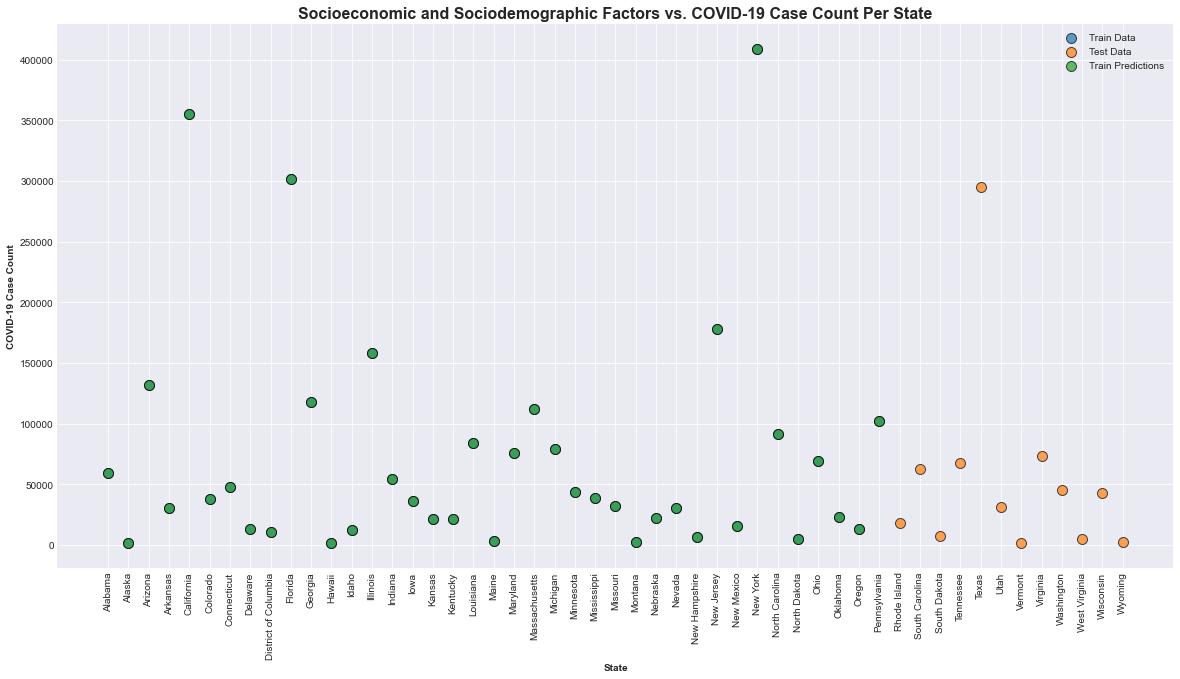

In [30]:
rcParams['figure.figsize'] = 20, 10

plt.figure()

plt.scatter(x = train['State'], y = train['cases'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.scatter(x = test['State'], y = test['cases'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.scatter(x = train['State'], y = train_predictions, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.title('Socioeconomic and Sociodemographic Factors vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Train Data', 'Test Data', 'Train Predictions'])

plt.xticks(rotation = 90)
plt.show();

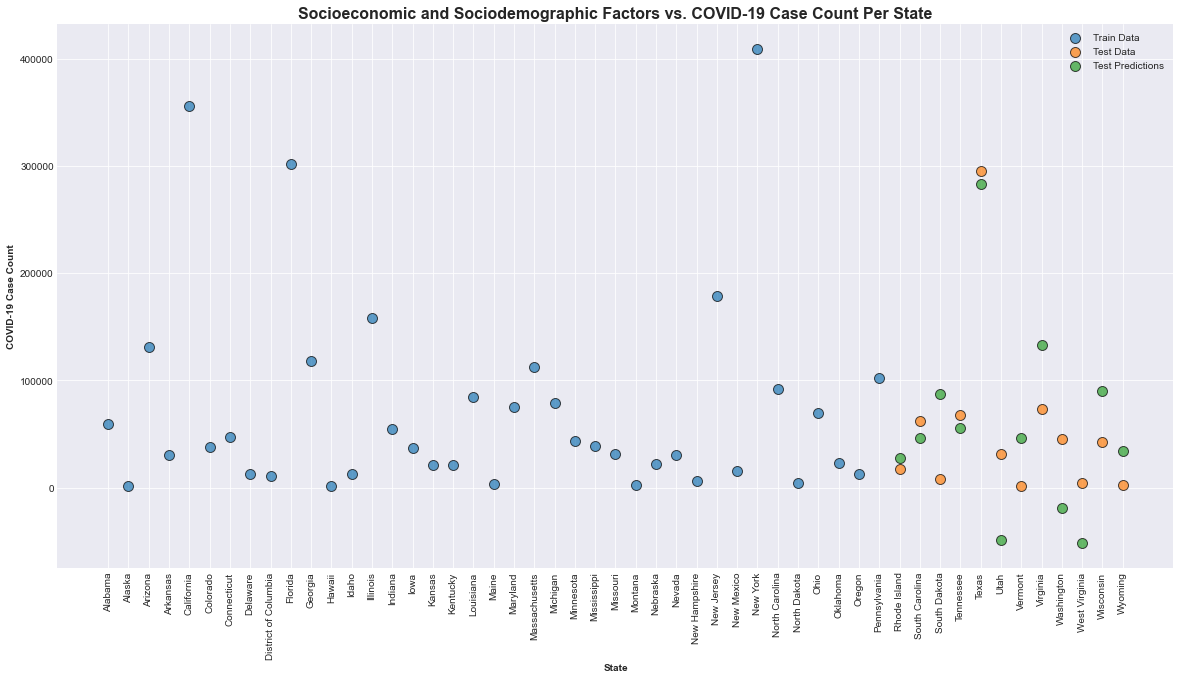

In [31]:
rcParams['figure.figsize'] = 20, 10

plt.figure()

plt.scatter(x = train['State'], y = train['cases'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.scatter(x = test['State'], y = test['cases'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.scatter(x = test['State'], y = test_predictions, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.title('Socioeconomic and Sociodemographic Factors vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Train Data', 'Test Data', 'Test Predictions'])

plt.xticks(rotation = 90)
plt.show();

In [32]:
evaluate(LinearModel, X_train_scaled, y_train_scaled)

Model Performance
Average Error: 0.0000 degrees.
Accuracy = 100.00%.


100.00000000000006

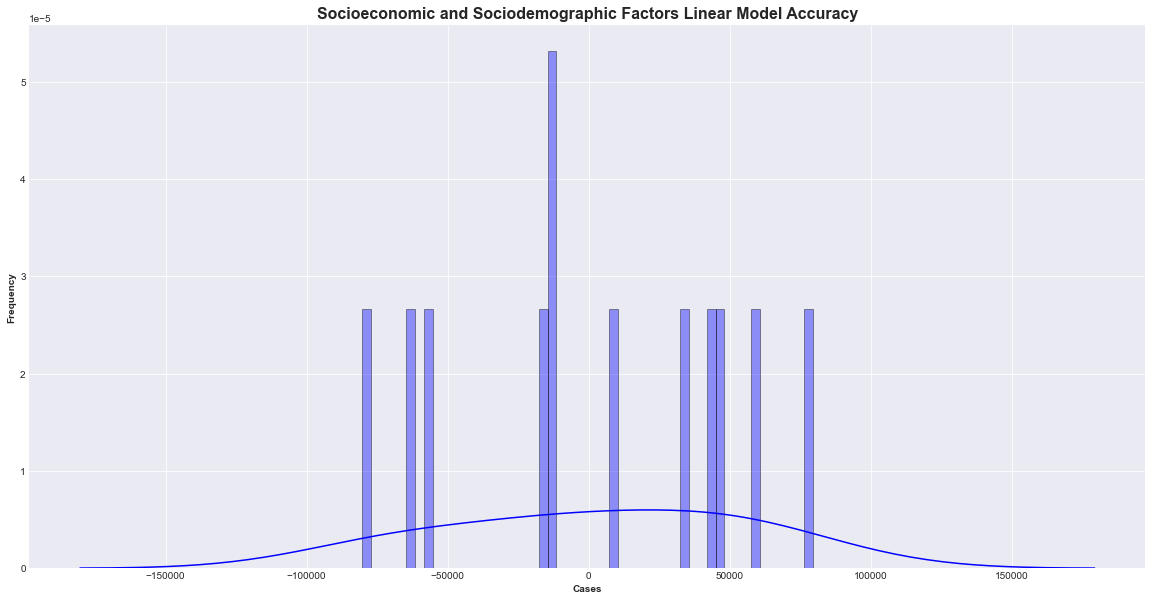

In [33]:
rcParams['figure.figsize'] = 20, 10

plt.figure()
sns.distplot((np.array(test_predictions).reshape(-1) - y_test), bins = 51, color = 'b', hist_kws = {'edgecolor':'k'})
plt.title('Socioeconomic and Sociodemographic Factors Linear Model Accuracy', fontsize = 16, fontweight = 'bold')
plt.xlabel('Cases', fontsize = 10, fontweight = 'bold')
plt.ylabel('Frequency', fontsize = 10, fontweight = 'bold')

plt.show();

## SVR

In [34]:
features_list = columns
    
target = 'cases'

X_train = train[features_list]
y_train = train[target]
X_test = test[features_list]
y_test = test[target]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
y_train_scaled = scaler.fit_transform(np.array(y_train).reshape(-1, 1))

SVRModel = SVR(kernel = 'linear')
SVRModel.fit(X_train_scaled, y_train_scaled)

train_predictions_scaled = SVRModel.predict(X_train_scaled)
train_predictions = scaler.inverse_transform(train_predictions_scaled)
test_predictions_scaled = SVRModel.predict(X_test_scaled)
test_predictions = scaler.inverse_transform(test_predictions_scaled)

Train_MAE = mean_absolute_error(y_train, train_predictions)
Train_MSE = mean_squared_error(y_train, train_predictions)
Train_RMS = sqrt(mean_squared_error(y_train, train_predictions))
Train_R2Score = r2_score(y_train, train_predictions)

Test_MAE = mean_absolute_error(y_test, test_predictions)
Test_MSE = mean_squared_error(y_test, test_predictions)
Test_RMS = sqrt(mean_squared_error(y_test, test_predictions))
Test_R2Score = r2_score(y_test, test_predictions)

print('Train MAE Value:', Train_MAE)
print('Train MSE Value:', Train_MSE)
print('Train RMS Value:', Train_RMS)
print('Train R2 Score:', Train_R2Score)
print('\n')

print('Test MAE Value:', Test_MAE)
print('Test MSE Value:', Test_MSE)
print('Test RMS Value:', Test_RMS)
print('Test R2 Score:', Test_R2Score)

Train MAE Value: 8640.208889356063
Train MSE Value: 80577364.90104823
Train RMS Value: 8976.489564470525
Train R2 Score: 0.9907662343719762


Test MAE Value: 28924.46130937819
Test MSE Value: 1097266797.2438307
Test RMS Value: 33125.017694241775
Test R2 Score: 0.8146667287177966


c:\python38\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


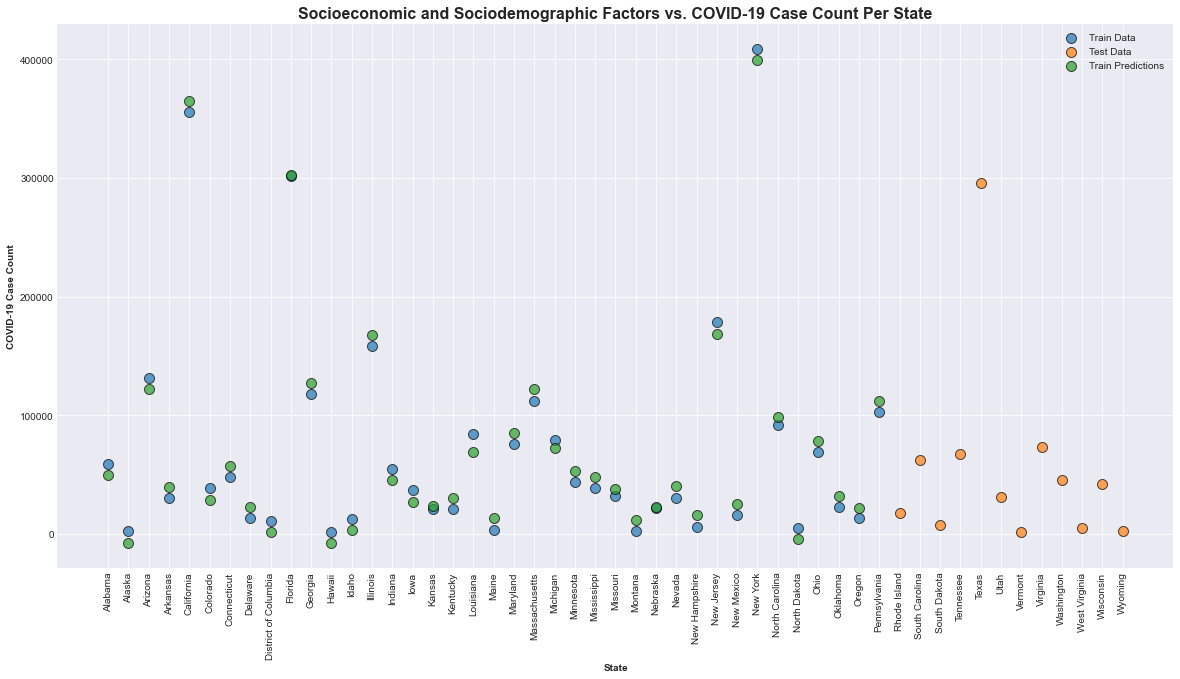

In [35]:
rcParams['figure.figsize'] = 20, 10

plt.figure()

plt.scatter(x = train['State'], y = train['cases'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.scatter(x = test['State'], y = test['cases'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.scatter(x = train['State'], y = train_predictions, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.title('Socioeconomic and Sociodemographic Factors vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Train Data', 'Test Data', 'Train Predictions'])

plt.xticks(rotation = 90)
plt.show();

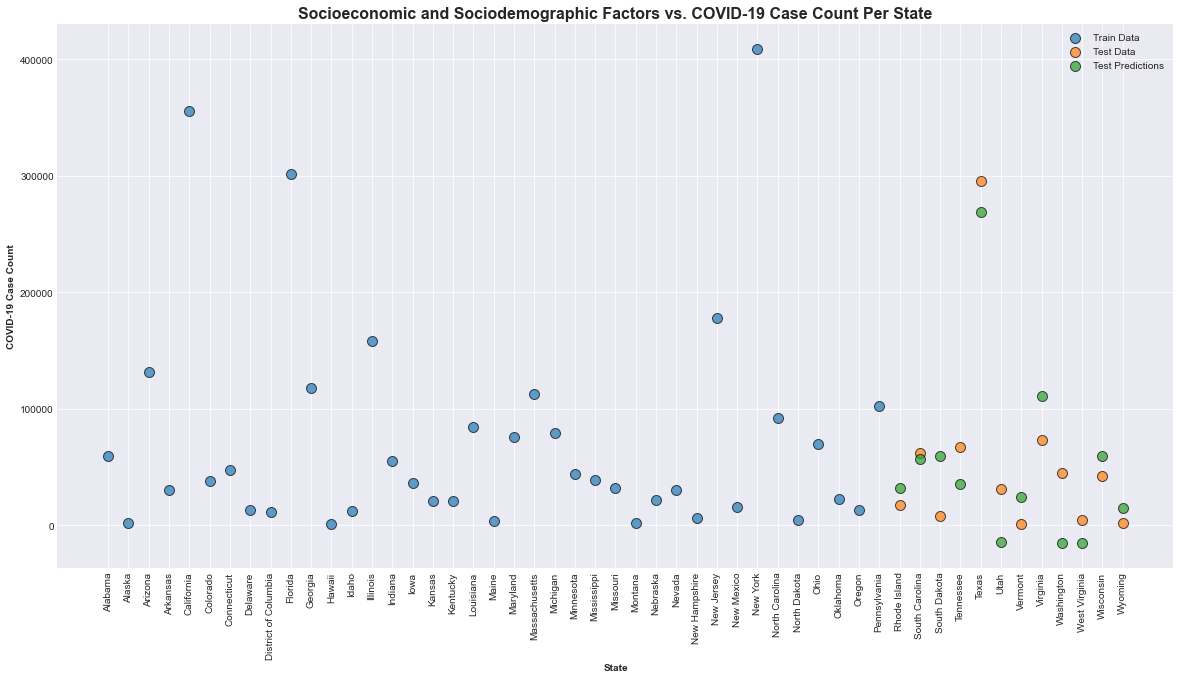

In [36]:
rcParams['figure.figsize'] = 20, 10

plt.figure()

plt.scatter(x = train['State'], y = train['cases'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.scatter(x = test['State'], y = test['cases'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.scatter(x = test['State'], y = test_predictions, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.title('Socioeconomic and Sociodemographic Factors vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Train Data', 'Test Data', 'Test Predictions'])

plt.xticks(rotation = 90)
plt.show();

In [37]:
evaluate(SVRModel, X_train_scaled, y_train_scaled)

Model Performance
Average Error: 0.9216 degrees.
Accuracy = 81.66%.


81.65903059040623

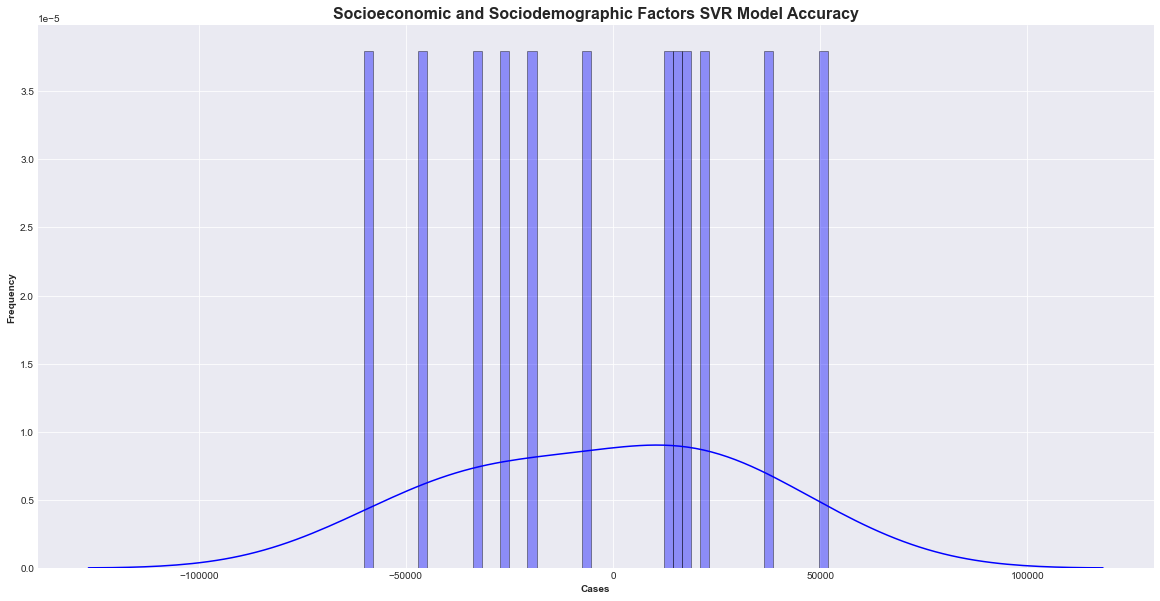

In [38]:
rcParams['figure.figsize'] = 20, 10

plt.figure()
sns.distplot((np.array(test_predictions).reshape(-1) - y_test), bins = 51, color = 'b', hist_kws = {'edgecolor':'k'})
plt.title('Socioeconomic and Sociodemographic Factors SVR Model Accuracy', fontsize = 16, fontweight = 'bold')
plt.xlabel('Cases', fontsize = 10, fontweight = 'bold')
plt.ylabel('Frequency', fontsize = 10, fontweight = 'bold')

plt.show();

## Random Forest Regression

In [39]:
features_list = columns
    
target = 'cases'

X_train = train[features_list]
y_train = train[target]
X_test = test[features_list]
y_test = test[target]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
y_train_scaled = scaler.fit_transform(np.array(y_train).reshape(-1, 1))

RanForModel = RandomForestRegressor()
RanForModel.fit(X_train_scaled, y_train_scaled)

train_predictions_scaled = RanForModel.predict(X_train_scaled)
train_predictions = scaler.inverse_transform(train_predictions_scaled)
test_predictions_scaled = RanForModel.predict(X_test_scaled)
test_predictions = scaler.inverse_transform(test_predictions_scaled)

Train_MAE = mean_absolute_error(y_train, train_predictions)
Train_MSE = mean_squared_error(y_train, train_predictions)
Train_RMS = sqrt(mean_squared_error(y_train, train_predictions))
Train_R2Score = r2_score(y_train, train_predictions)

Test_MAE = mean_absolute_error(y_test, test_predictions)
Test_MSE = mean_squared_error(y_test, test_predictions)
Test_RMS = sqrt(mean_squared_error(y_test, test_predictions))
Test_R2Score = r2_score(y_test, test_predictions)

print('Train MAE Value:', Train_MAE)
print('Train MSE Value:', Train_MSE)
print('Train RMS Value:', Train_RMS)
print('Train R2 Score:', Train_R2Score)
print('\n')

print('Test MAE Value:', Test_MAE)
print('Test MSE Value:', Test_MSE)
print('Test RMS Value:', Test_RMS)
print('Test R2 Score:', Test_R2Score)

<ipython-input-39-e8fbe4dc92cb>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RanForModel.fit(X_train_scaled, y_train_scaled)


Train MAE Value: 7550.34211599511
Train MSE Value: 182419681.57082534
Train RMS Value: 13506.283040526929
Train R2 Score: 0.9790956109369888


Test MAE Value: 13932.109694444467
Test MSE Value: 629310541.2895119
Test RMS Value: 25086.06269005784
Test R2 Score: 0.8937066340086823


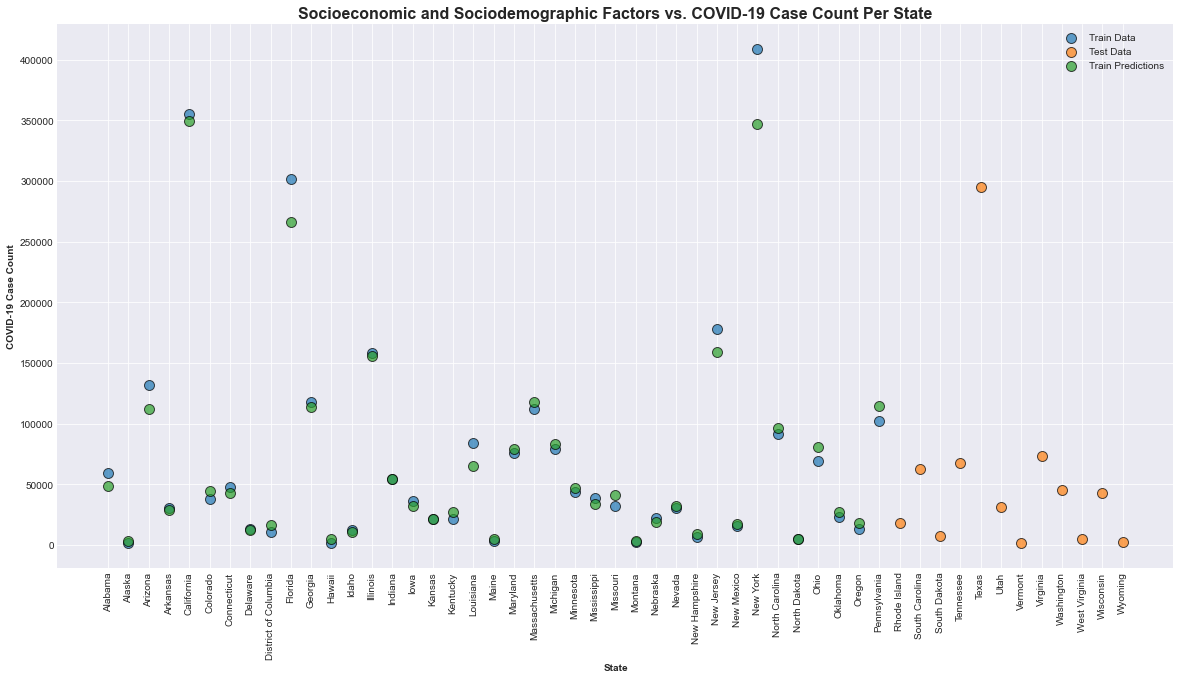

In [40]:
rcParams['figure.figsize'] = 20, 10

plt.figure()

plt.scatter(x = train['State'], y = train['cases'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.scatter(x = test['State'], y = test['cases'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.scatter(x = train['State'], y = train_predictions, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.title('Socioeconomic and Sociodemographic Factors vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Train Data', 'Test Data', 'Train Predictions'])

plt.xticks(rotation = 90)
plt.show();

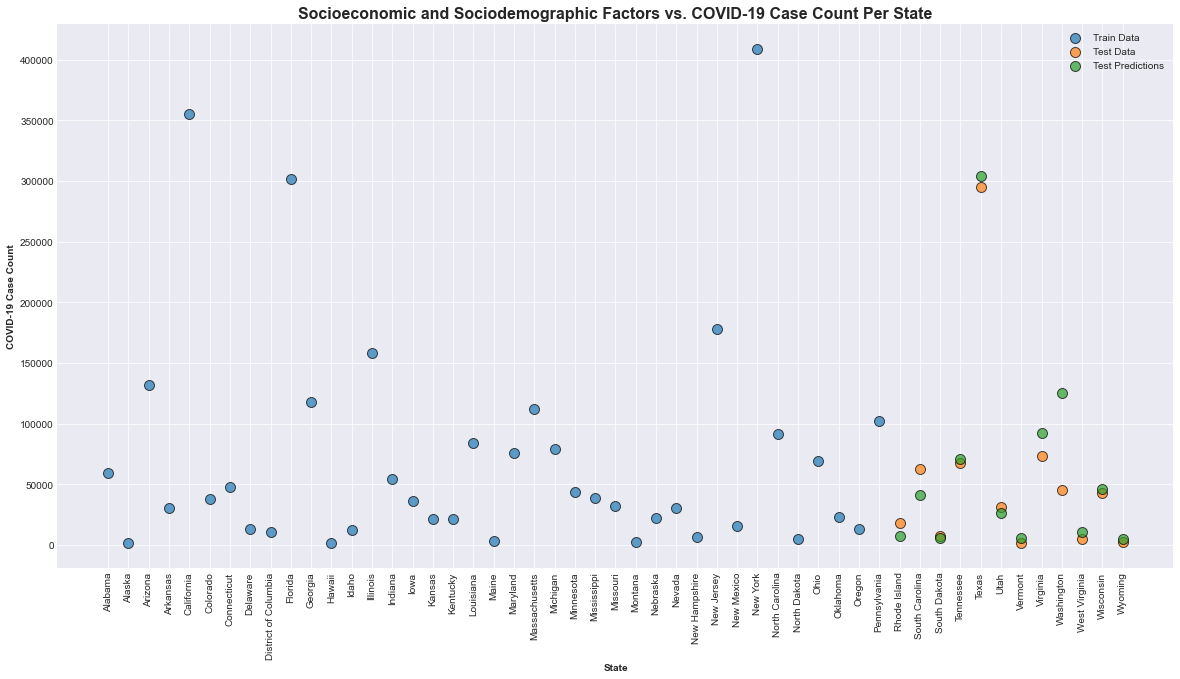

In [41]:
rcParams['figure.figsize'] = 20, 10

plt.figure()

plt.scatter(x = train['State'], y = train['cases'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.scatter(x = test['State'], y = test['cases'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.scatter(x = test['State'], y = test_predictions, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.title('Socioeconomic and Sociodemographic Factors vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Train Data', 'Test Data', 'Test Predictions'])

plt.xticks(rotation = 90)
plt.show();

In [42]:
evaluate(RanForModel, X_train_scaled, y_train_scaled)

Model Performance
Average Error: 0.8803 degrees.
Accuracy = 79.16%.


79.16176584333816

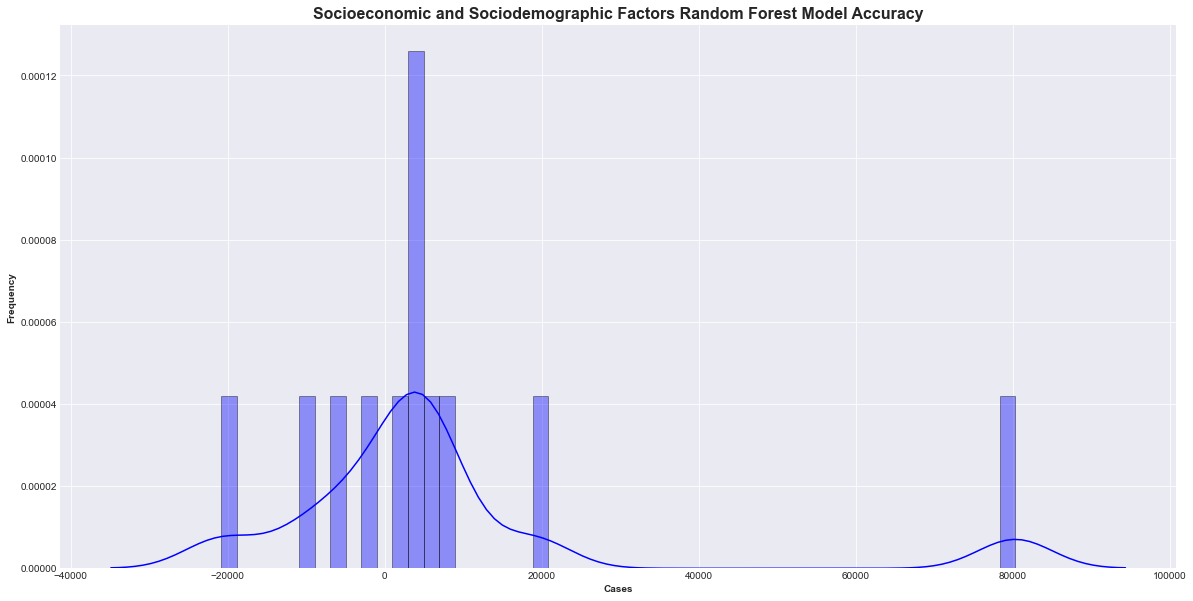

In [43]:
rcParams['figure.figsize'] = 20, 10

plt.figure()
sns.distplot((np.array(test_predictions).reshape(-1) - y_test), bins = 51, color = 'b', hist_kws = {'edgecolor':'k'})
plt.title('Socioeconomic and Sociodemographic Factors Random Forest Model Accuracy', fontsize = 16, fontweight = 'bold')
plt.xlabel('Cases', fontsize = 10, fontweight = 'bold')
plt.ylabel('Frequency', fontsize = 10, fontweight = 'bold')

plt.show();

### Tuning

In [44]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [10, 20, 30, 40, 50],
    'min_samples_leaf': [1, 2, 5, 10, 15, 20],
    'min_samples_split': [8, 10, 12, 16, 20, 24],
    'n_estimators': [100, 200, 300, 400, 500, 1000]
}

kfold = KFold(n_splits = 4)

RF_NewModel = GridSearchCV(estimator = RanForModel, param_grid = param_grid, 
                          cv = kfold, n_jobs = -1, verbose = 2, return_train_score=True)

RF_NewModel.fit(X_train_scaled, y_train_scaled);

Fitting 4 folds for each of 1080 candidates, totalling 4320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   36.3s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed: 10.8min
[Parallel(n_jobs=-1)]: Done 989 tasks      | elapsed: 16.2min
[Parallel(n_jobs=-1)]: Done 1434 tasks      | elapsed: 22.6min
[Parallel(n_jobs=-1)]: Done 1961 tasks      | elapsed: 30.5min
[Parallel(n_jobs=-1)]: Done 2568 tasks      | elapsed: 37.8min
[Parallel(n_jobs=-1)]: Done 3257 tasks      | elapsed: 42.8min
[Parallel(n_jobs=-1)]: Done 4026 tasks      | elapsed: 46.3min
[Parallel(n_jobs=-1)]: Done 4320 out of 4320 | elapsed: 47.4min finished
c:\python38\lib\site-packages\sklearn\model_selection\_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


In [45]:
RF_NewModel.best_params_

{'bootstrap': True,
 'max_depth': 20,
 'min_samples_leaf': 1,
 'min_samples_split': 8,
 'n_estimators': 100}

In [46]:
train_predictions_scaled = RF_NewModel.predict(X_train_scaled)
train_predictions = scaler.inverse_transform(train_predictions_scaled)
test_predictions_scaled = RF_NewModel.predict(X_test_scaled)
test_predictions = scaler.inverse_transform(test_predictions_scaled)

Train_MAE = mean_absolute_error(y_train, train_predictions)
Train_MSE = mean_squared_error(y_train, train_predictions)
Train_RMS = sqrt(mean_squared_error(y_train, train_predictions))
Train_R2Score = r2_score(y_train, train_predictions)

Test_MAE = mean_absolute_error(y_test, test_predictions)
Test_MSE = mean_squared_error(y_test, test_predictions)
Test_RMS = sqrt(mean_squared_error(y_test, test_predictions))
Test_R2Score = r2_score(y_test, test_predictions)

print('Train MAE Value:', Train_MAE)
print('Train MSE Value:', Train_MSE)
print('Train RMS Value:', Train_RMS)
print('Train R2 Score:', Train_R2Score)
print('\n')

print('Test MAE Value:', Test_MAE)
print('Test MSE Value:', Test_MSE)
print('Test RMS Value:', Test_RMS)
print('Test R2 Score:', Test_R2Score)

Train MAE Value: 11480.101284344219
Train MSE Value: 426171380.8785706
Train RMS Value: 20643.91873842199
Train R2 Score: 0.9511628774006632


Test MAE Value: 15509.040414836316
Test MSE Value: 638127524.4965235
Test RMS Value: 25261.186126081324
Test R2 Score: 0.8922174060973846


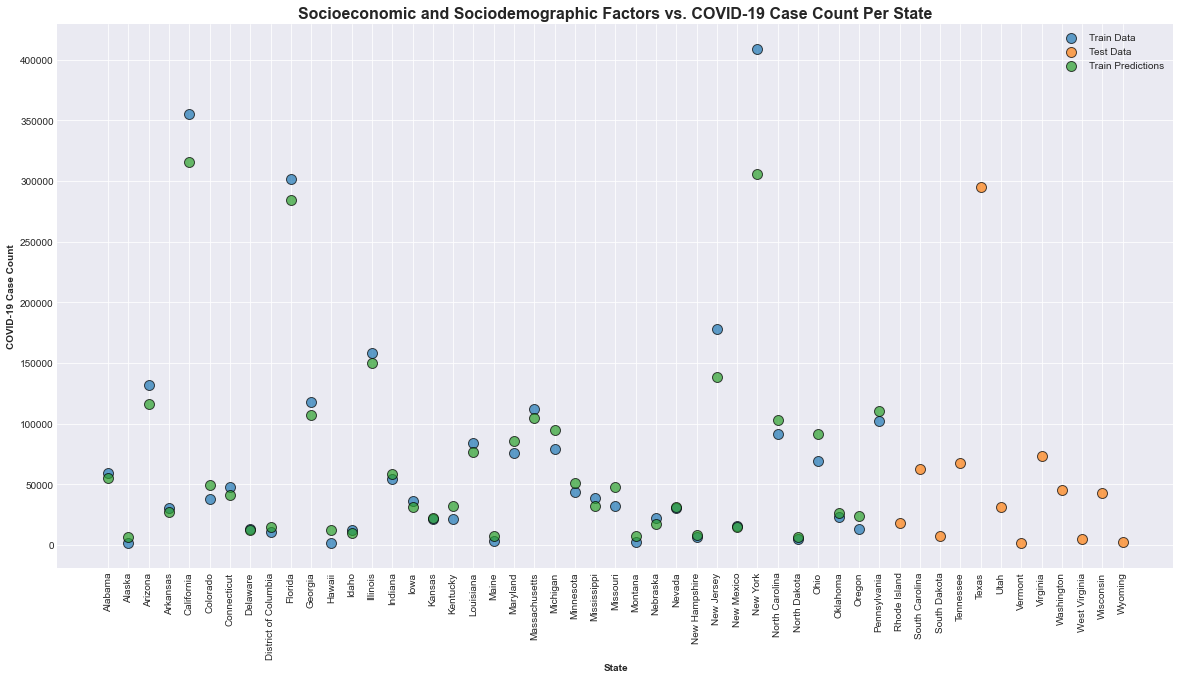

In [47]:
rcParams['figure.figsize'] = 20, 10

plt.figure()

plt.scatter(x = train['State'], y = train['cases'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.scatter(x = test['State'], y = test['cases'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.scatter(x = train['State'], y = train_predictions, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.title('Socioeconomic and Sociodemographic Factors vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Train Data', 'Test Data', 'Train Predictions'])

plt.xticks(rotation = 90)
plt.show();

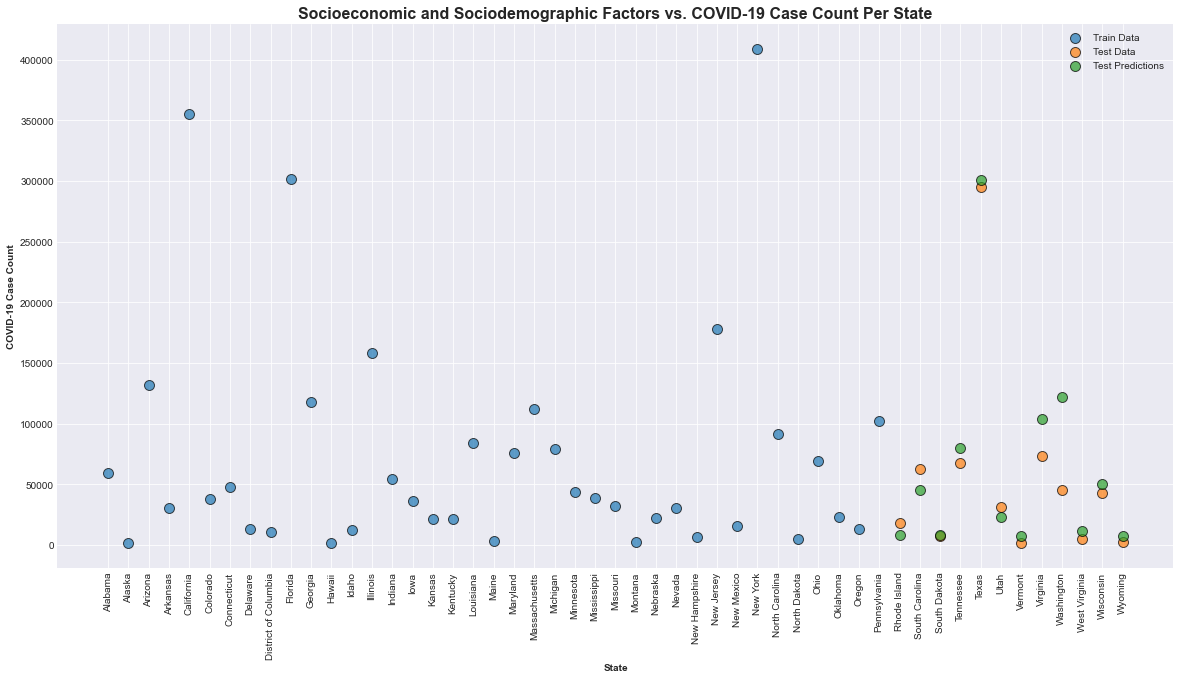

In [48]:
rcParams['figure.figsize'] = 20, 10

plt.figure()

plt.scatter(x = train['State'], y = train['cases'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.scatter(x = test['State'], y = test['cases'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.scatter(x = test['State'], y = test_predictions, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.title('Socioeconomic and Sociodemographic Factors vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Train Data', 'Test Data', 'Test Predictions'])

plt.xticks(rotation = 90)
plt.show();

In [49]:
base_accuracy = evaluate(RanForModel, X_train_scaled, y_train_scaled)

Model Performance
Average Error: 0.8803 degrees.
Accuracy = 79.16%.


In [50]:
new_accuracy = evaluate(RF_NewModel, X_train_scaled, y_train_scaled)

Model Performance
Average Error: 0.8608 degrees.
Accuracy = 82.27%.


In [51]:
print('Improvement of {:0.2f}%.'.format( 100 * (new_accuracy - base_accuracy) / new_accuracy))

Improvement of 3.78%.


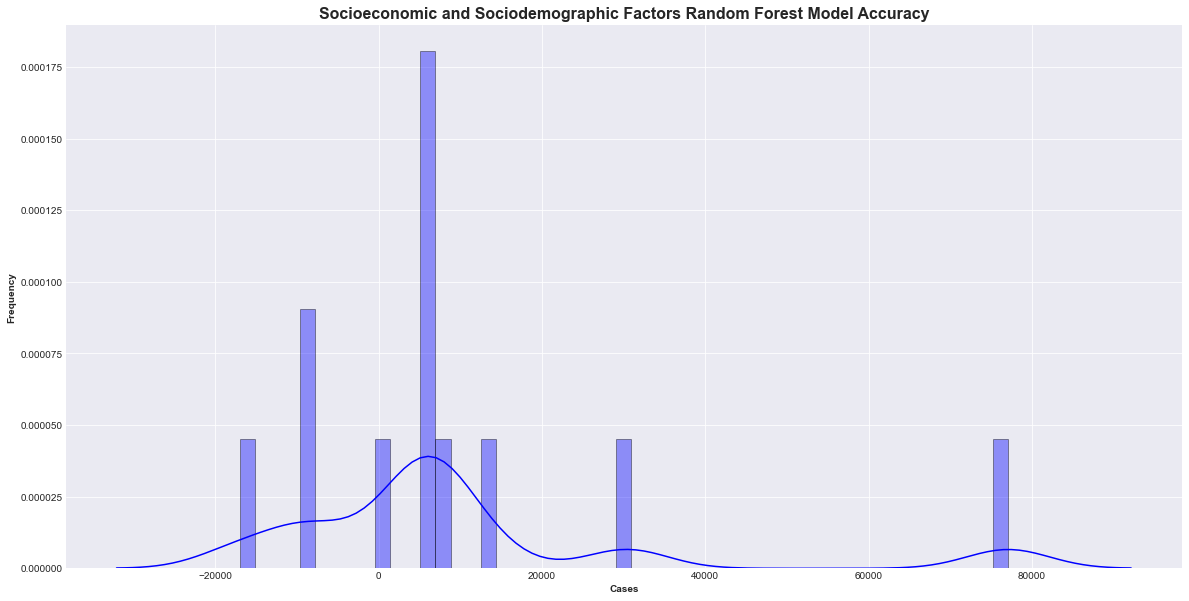

In [52]:
rcParams['figure.figsize'] = 20, 10

plt.figure()
sns.distplot((np.array(test_predictions).reshape(-1) - y_test), bins = 51, color = 'b', hist_kws = {'edgecolor':'k'})
plt.title('Socioeconomic and Sociodemographic Factors Random Forest Model Accuracy', fontsize = 16, fontweight = 'bold')
plt.xlabel('Cases', fontsize = 10, fontweight = 'bold')
plt.ylabel('Frequency', fontsize = 10, fontweight = 'bold')

plt.show();

## XGBoost

In [53]:
features_list = columns
    
target = 'cases'

X_train = train[features_list]
y_train = train[target]
X_test = test[features_list]
y_test = test[target]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
y_train_scaled = scaler.fit_transform(np.array(y_train).reshape(-1, 1))

XGBmodel = XGBRegressor()
XGBmodel.fit(X_train_scaled, y_train_scaled)

train_predictions_scaled = XGBmodel.predict(X_train_scaled)
train_predictions = scaler.inverse_transform(train_predictions_scaled)
test_predictions_scaled = XGBmodel.predict(X_test_scaled)
test_predictions = scaler.inverse_transform(test_predictions_scaled)

Train_MAE = mean_absolute_error(y_train, train_predictions)
Train_MSE = mean_squared_error(y_train, train_predictions)
Train_RMS = sqrt(mean_squared_error(y_train, train_predictions))
Train_R2Score = r2_score(y_train, train_predictions)

Test_MAE = mean_absolute_error(y_test, test_predictions)
Test_MSE = mean_squared_error(y_test, test_predictions)
Test_RMS = sqrt(mean_squared_error(y_test, test_predictions))
Test_R2Score = r2_score(y_test, test_predictions)

print('Train MAE Value:', Train_MAE)
print('Train MSE Value:', Train_MSE)
print('Train RMS Value:', Train_RMS)
print('Train R2 Score:', Train_R2Score)
print('\n')

print('Test MAE Value:', Test_MAE)
print('Test MSE Value:', Test_MSE)
print('Test RMS Value:', Test_RMS)
print('Test R2 Score:', Test_R2Score)

Train MAE Value: 23.118257962740383
Train MSE Value: 1253.0613576578787
Train RMS Value: 35.398606719161684
Train R2 Score: 0.9999998564053949


Test MAE Value: 14945.629964192709
Test MSE Value: 713204117.8083761
Test RMS Value: 26705.8817081252
Test R2 Score: 0.8795366335904979


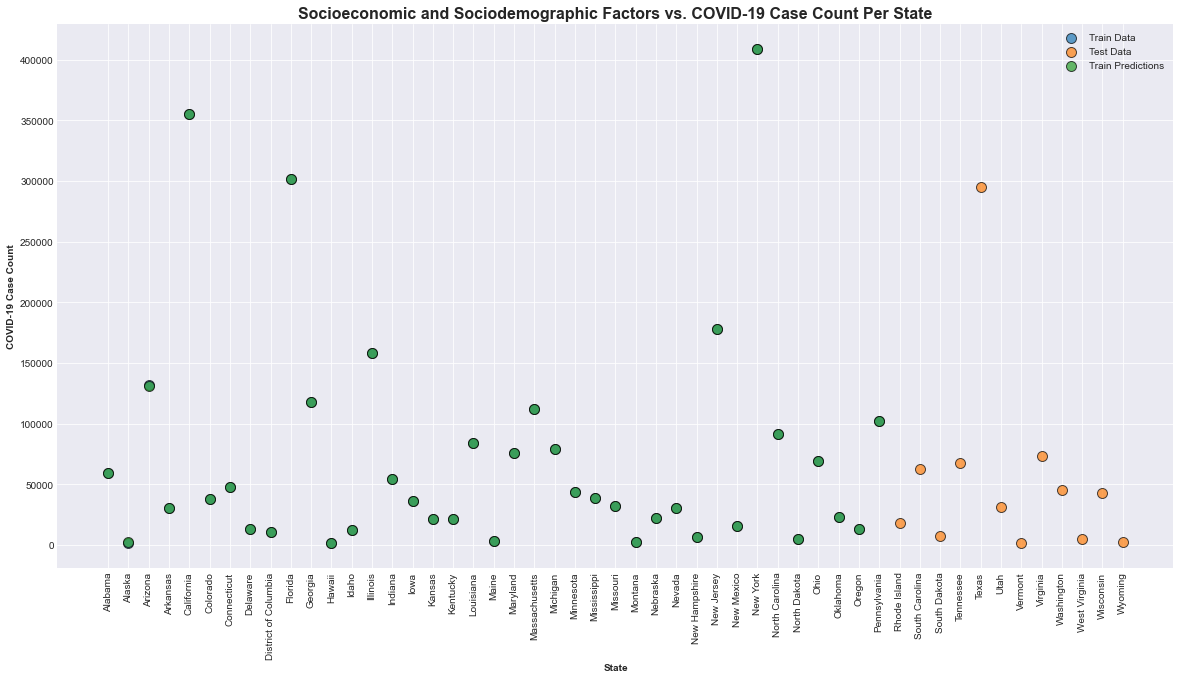

In [54]:
rcParams['figure.figsize'] = 20, 10

plt.figure()

plt.scatter(x = train['State'], y = train['cases'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.scatter(x = test['State'], y = test['cases'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.scatter(x = train['State'], y = train_predictions, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.title('Socioeconomic and Sociodemographic Factors vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Train Data', 'Test Data', 'Train Predictions'])

plt.xticks(rotation = 90)
plt.show();

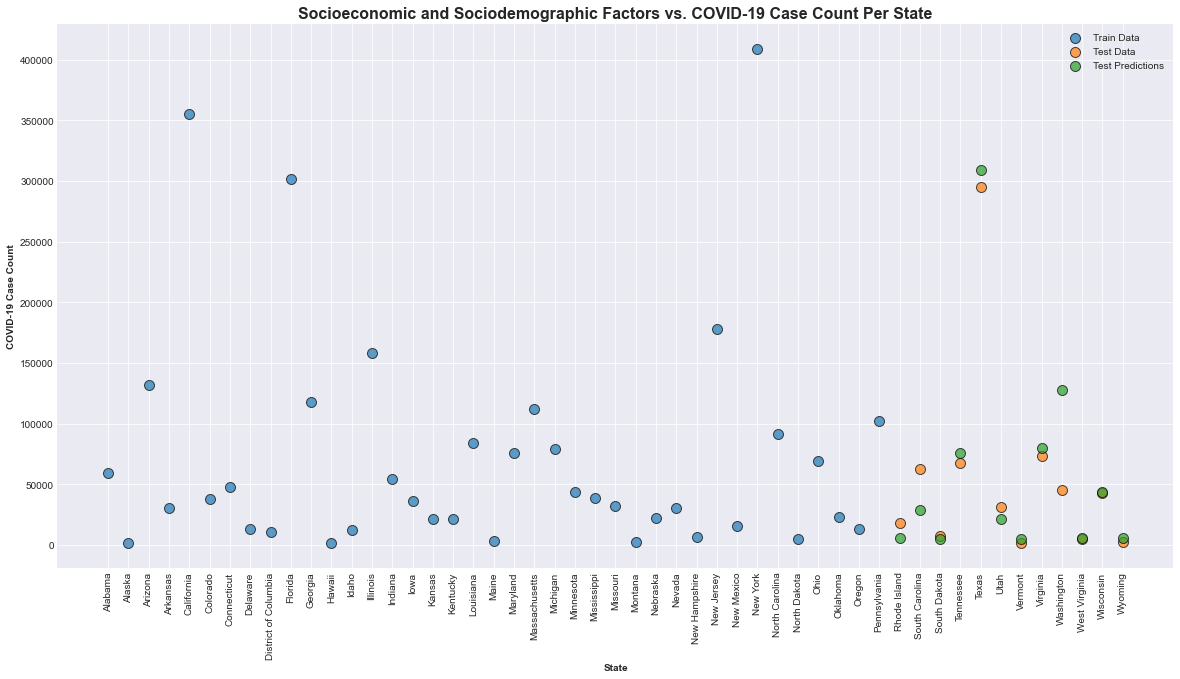

In [55]:
rcParams['figure.figsize'] = 20, 10

plt.figure()

plt.scatter(x = train['State'], y = train['cases'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.scatter(x = test['State'], y = test['cases'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.scatter(x = test['State'], y = test_predictions, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.title('Socioeconomic and Sociodemographic Factors vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Train Data', 'Test Data', 'Test Predictions'])

plt.xticks(rotation = 90)
plt.show();

In [56]:
evaluate(XGBmodel, X_train_scaled, y_train_scaled)

Model Performance
Average Error: 0.9153 degrees.
Accuracy = 79.43%.


79.43072954459332

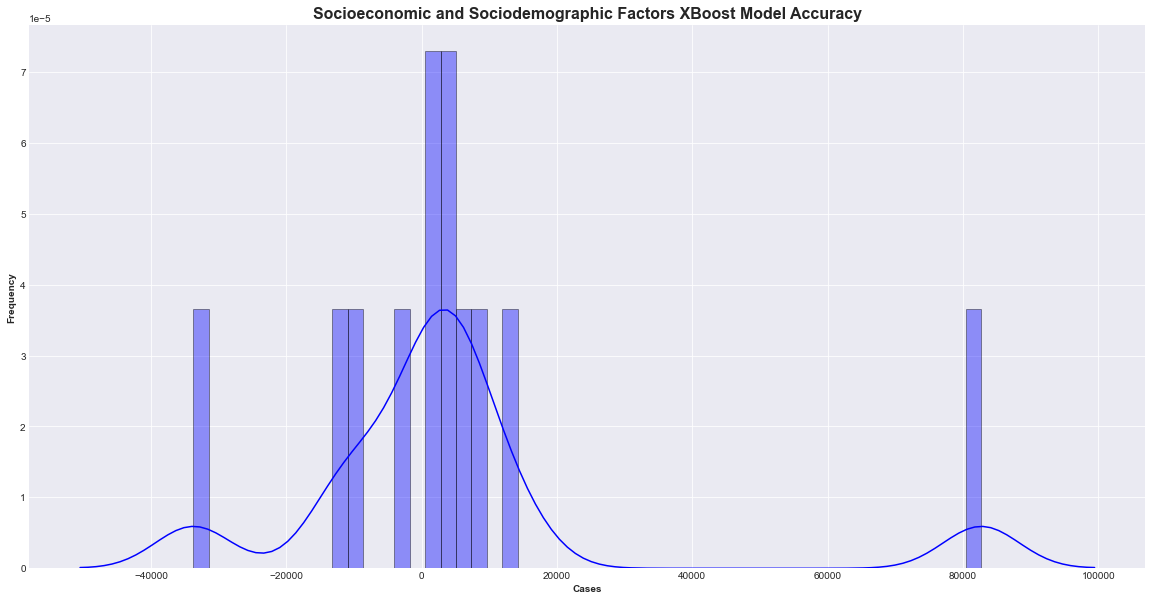

In [57]:
rcParams['figure.figsize'] = 20, 10

plt.figure()
sns.distplot((np.array(test_predictions).reshape(-1) - y_test), bins = 51, color = 'b', hist_kws = {'edgecolor':'k'})
plt.title('Socioeconomic and Sociodemographic Factors XBoost Model Accuracy', fontsize = 16, fontweight = 'bold')
plt.xlabel('Cases', fontsize = 10, fontweight = 'bold')
plt.ylabel('Frequency', fontsize = 10, fontweight = 'bold')

plt.show();

### Tuning

In [58]:
param_grid = {
    "learning_rate": [0.05, 0.06, 0.07, 0.08, 0.09, 0.1],
    "max_depth": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    "reg_lambda": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    "colsample_bytree":[0.7, 0.8, 0.9, 1.0],
    "min_child_weight": [1, 2, 3]
}

kfold = KFold(n_splits = 7)

XG_GridModel = GridSearchCV(estimator = XGBmodel, param_grid = param_grid, 
                          cv = kfold, n_jobs = -1, verbose = 2, return_train_score=True)

XG_NewModel = XG_GridModel.fit(X_train_scaled, y_train_scaled);

Fitting 7 folds for each of 7200 candidates, totalling 50400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:   12.5s
[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:   23.5s
[Parallel(n_jobs=-1)]: Done 989 tasks      | elapsed:   41.5s
[Parallel(n_jobs=-1)]: Done 1434 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 1961 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 2568 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 3257 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 4026 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 4877 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 5808 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 6821 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 7914 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]: Done 9089 tasks      | 

In [59]:
XG_NewModel.best_params_

{'colsample_bytree': 0.9,
 'learning_rate': 0.1,
 'max_depth': 4,
 'min_child_weight': 1,
 'reg_lambda': 8}

In [60]:
train_predictions_scaled = XG_NewModel.predict(X_train_scaled)
train_predictions = scaler.inverse_transform(train_predictions_scaled)
test_predictions_scaled = XG_NewModel.predict(X_test_scaled)
test_predictions = scaler.inverse_transform(test_predictions_scaled)

Train_MAE = mean_absolute_error(y_train, train_predictions)
Train_MSE = mean_squared_error(y_train, train_predictions)
Train_RMS = sqrt(mean_squared_error(y_train, train_predictions))
Train_R2Score = r2_score(y_train, train_predictions)

Test_MAE = mean_absolute_error(y_test, test_predictions)
Test_MSE = mean_squared_error(y_test, test_predictions)
Test_RMS = sqrt(mean_squared_error(y_test, test_predictions))
Test_R2Score = r2_score(y_test, test_predictions)

print('Train MAE Value:', Train_MAE)
print('Train MSE Value:', Train_MSE)
print('Train RMS Value:', Train_RMS)
print('Train R2 Score:', Train_R2Score)
print('\n')

print('Test MAE Value:', Test_MAE)
print('Test MSE Value:', Test_MSE)
print('Test RMS Value:', Test_RMS)
print('Test R2 Score:', Test_R2Score)

Train MAE Value: 2150.909930889423
Train MSE Value: 87825581.08530551
Train RMS Value: 9371.530349164192
Train R2 Score: 0.9899356248137104


Test MAE Value: 11787.828369140625
Test MSE Value: 601557977.4495784
Test RMS Value: 24526.678891557625
Test R2 Score: 0.8983941662076359


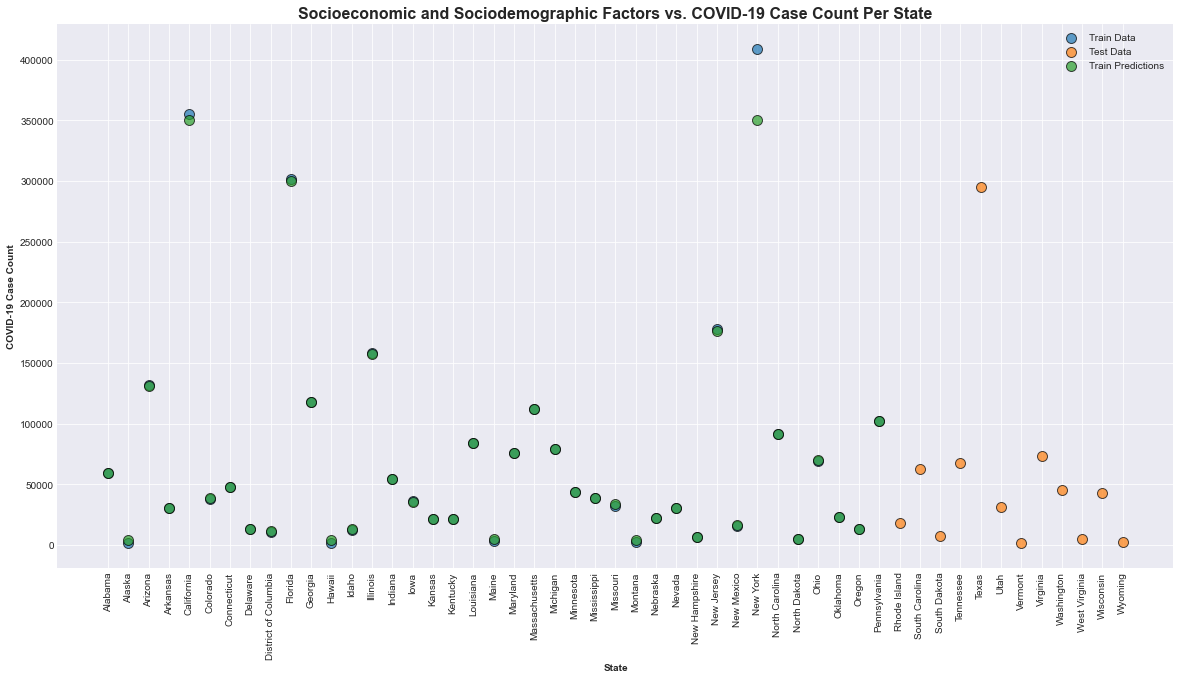

In [61]:
rcParams['figure.figsize'] = 20, 10

plt.figure()

plt.scatter(x = train['State'], y = train['cases'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.scatter(x = test['State'], y = test['cases'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.scatter(x = train['State'], y = train_predictions, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.title('Socioeconomic and Sociodemographic Factors vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Train Data', 'Test Data', 'Train Predictions'])

plt.xticks(rotation = 90)
plt.show();

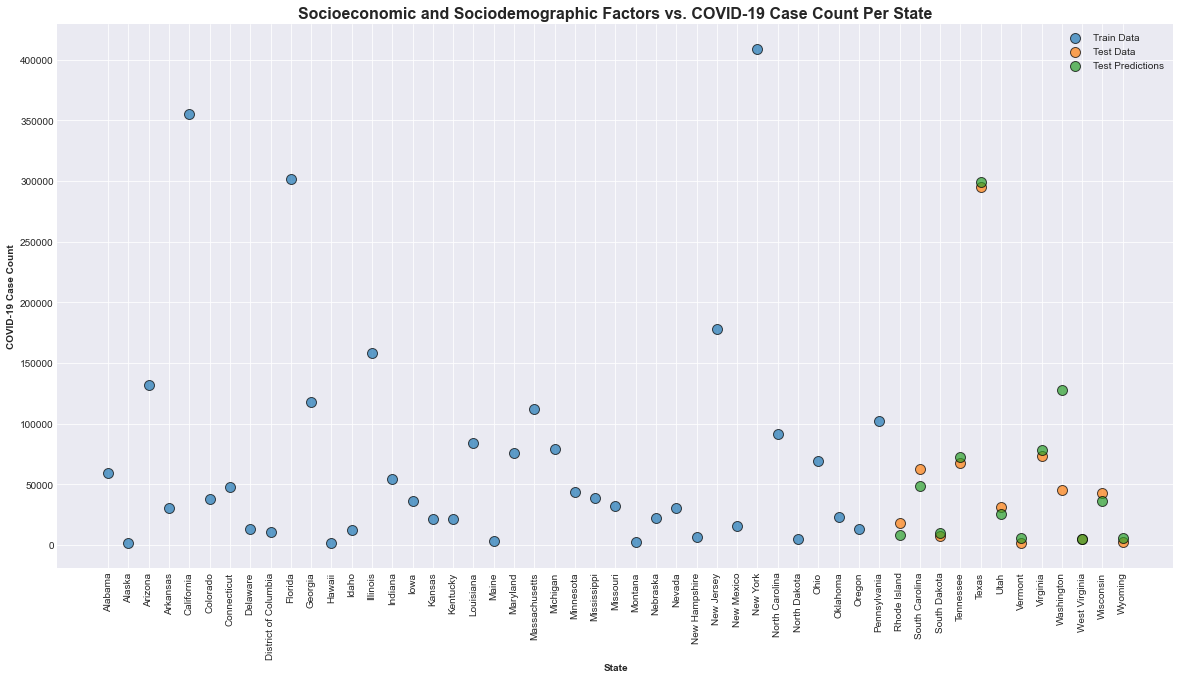

In [62]:
rcParams['figure.figsize'] = 20, 10

plt.figure()

plt.scatter(x = train['State'], y = train['cases'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.scatter(x = test['State'], y = test['cases'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.scatter(x = test['State'], y = test_predictions, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.title('Socioeconomic and Sociodemographic Factors vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Train Data', 'Test Data', 'Test Predictions'])

plt.xticks(rotation = 90)
plt.show();

In [63]:
base_accuracy = evaluate(XGBmodel, X_train_scaled, y_train_scaled)

Model Performance
Average Error: 0.9153 degrees.
Accuracy = 79.43%.


In [64]:
new_accuracy = evaluate(XG_NewModel, X_train_scaled, y_train_scaled)

Model Performance
Average Error: 0.8957 degrees.
Accuracy = 79.38%.


In [65]:
print('Improvement of {:0.2f}%.'.format( 100 * (new_accuracy - base_accuracy) / new_accuracy))

Improvement of -0.07%.


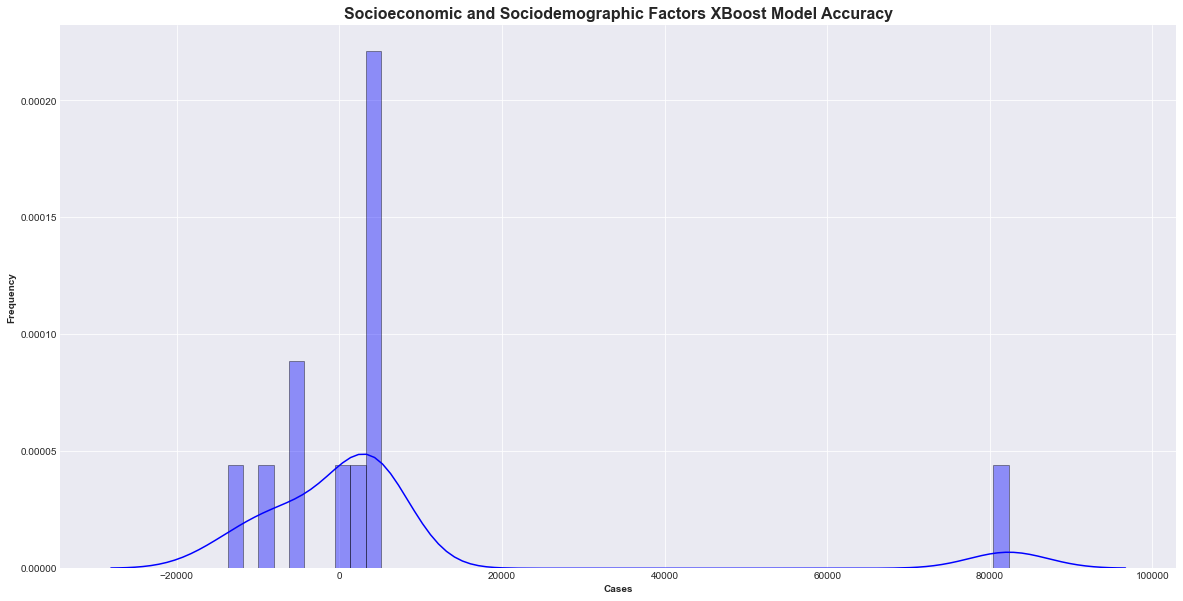

In [66]:
rcParams['figure.figsize'] = 20, 10

plt.figure()
sns.distplot((np.array(test_predictions).reshape(-1) - y_test), bins = 51, color = 'b', hist_kws = {'edgecolor':'k'})
plt.title('Socioeconomic and Sociodemographic Factors XBoost Model Accuracy', fontsize = 16, fontweight = 'bold')
plt.xlabel('Cases', fontsize = 10, fontweight = 'bold')
plt.ylabel('Frequency', fontsize = 10, fontweight = 'bold')

plt.show();

## Logistic Regression

In [67]:
COVID_DFLogReg = COVID_DF

CasesMean = COVID_DFLogReg['cases'].mean()

COVID_DFLogReg['Cases_Avg'] = COVID_DFLogReg['cases'].apply(lambda x: classify(x, CasesMean))

COVID_DFLogReg.head(25)

,State,AGI Total,AGI Top 1 Percent,AGI Top 5 Percent,AGI Top 10 Percent,AGI Top 25 Percent,AGI Top 50 Percent,AGI Top 75 Percent,Total Population,Total population_Male,...,Employer Sponsored Insurance Premium Costs (Family Coverage),Employee Contribution to Premium Costs (Single Coverage),Employee Contribution to Premium Costs (Family Coverage),Employee Contribution to Premium Costs (Combined Average),Employee Deductible Costs (Single Coverage),Employee Deductible Costs (Combined Average),Total Potential Out-of-Pocket Costs (Employee Contribution + Deductible),cases,deaths,Cases_Avg
0,Alabama,119662909,18553159,35924229,49537638,76667112,101687773,114405941,4887871,2369271,...,18001,1453,5278,4260,1569,2563,6824,59067,1211,0
1,Alaska,23969001,2848087,6184956,8915998,14554105,20064361,22927860,737438,382952,...,21648,1154,4501,3695,1797,2881,6576,1954,15,0
2,Arizona,197753744,33609317,63073164,85351788,128616004,168531690,189378565,7171646,3565129,...,18875,1554,5786,4834,2166,3530,8364,131411,2442,1
3,Arkansas,74634888,16319991,26475276,34256878,49689104,64088761,71584342,3013825,1476680,...,17995,1375,5728,4661,1501,2741,7403,30297,335,0
4,California,1549284943,356240355,600859502,772738760,1086299917,1360947743,1497300869,39557045,19673553,...,19567,1202,5376,4127,1680,2767,6894,355497,7368,1
5,Colorado,212581123,37479649,69617571,93359185,138935934,181679584,204043171,5695564,2864761,...,18314,1289,4963,4007,2005,3489,7495,38240,1745,0
6,Connecticut,175792834,47379889,74456114,92142733,125039874,155284852,170426876,3572665,1740533,...,20735,1672,5352,4407,2322,3409,7816,47636,4380,0
7,Delaware,31403165,4412370,8899481,12464894,19652753,26529258,30056514,967171,467924,...,20098,1340,5715,4564,1710,2871,7435,13050,521,0
8,District of Columbia,34743188,7442186,13245281,17240750,24153683,30301657,33570901,702455,334208,...,21810,1369,6358,3960,1308,1855,5815,11026,571,0
9,Florida,750608252,213461301,325886670,401558825,540976844,663846145,726074247,21299325,10404676,...,18934,1472,5908,4712,1963,3213,7925,301802,4520,1


In [68]:
model2 = sm.OLS(COVID_DFLogReg['Cases_Avg'], COVID_DFLogReg[columns], missing = 'drop').fit()
model2.summary()

c:\python38\lib\site-packages\statsmodels\regression\linear_model.py:1698: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
c:\python38\lib\site-packages\statsmodels\regression\linear_model.py:1698: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
c:\python38\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
c:\python38\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
c:\python38\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
c:\python38\lib\site-packages\statsmodels\regression\linear_model.py:1620: RuntimeWarning: divide by zero encountered in double_scalars
  

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Cases_Avg   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Wed, 22 Jul 2020   Prob (F-statistic):                nan
Time:                        01:20:16   Log-Likelihood:                 1236.1
No. Observations:                  51   AIC:                            -2370.
Df Residuals:                       0   BIC:                            -2272.
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
====================================================================================================================================
                                                                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------
AGI Top 1 Percent                                                -4.808e-08        inf         -0        nan         nan         nan
AGI Top 5 Percent                                                 1.968e-06        inf          0        nan         nan         nan
AGI Top 10 Percent                                               -3.498e-06        inf         -0        nan         nan         nan
AGI Top 25 Percent                                                2.465e-06        inf          0        nan         nan         nan
AGI Top 50 Percent                                               -1.161e-06        inf         -0        nan         nan         nan
AGI Top 75 Percent                                                2.808e-07        inf          0        nan         nan         nan
Under 5 years                                                     1.694e-05        inf          0        nan         nan         nan
5 to 9 years                                                     -2.391e-05        inf         -0        nan         nan         nan
10 to 14 years                                                    2.912e-05        inf          0        nan         nan         nan
15 to 19 years                                                   -9.053e-06        inf         -0        nan         nan         nan
20 to 24 years                                                     7.06e-06        inf          0        nan         nan         nan
25 to 34 years                                                    1.183e-05        inf          0        nan         nan         nan
35 to 44 years                                                   -1.786e-05        inf         -0        nan         nan         nan
45 to 54 years                                                    1.547e-05        inf          0        nan         nan         nan
55 to 59 years                                                   -2.837e-05        inf         -0        nan         nan         nan
60 to 64 years                                                   -1.938e-05        inf         -0        nan         nan         nan
65 to 74 years                                                     5.37e-06        inf          0        nan         nan         nan
75 to 84 years                                                   -1.397e-05        inf         -0        nan         nan         nan
85 years and over                                                 1.892e-05        inf          0        nan         nan         nan
White                                                             1.195e-06        inf          0        nan         nan         nan
Black or African America

In [69]:
test_len = int(0.25 * len(COVID_DFLogReg))
train_len = len(COVID_DFLogReg) - test_len
print('Train Set Len: ' + str(train_len))
print('Test Set Len: ' + str(test_len))

train = COVID_DFLogReg[:train_len]
test = COVID_DFLogReg[train_len:]
print('Train Set Shape: ' + str(train.shape))
print('Test Set Shape: ' + str(test.shape))

Train Set Len: 39
Test Set Len: 12
Train Set Shape: (39, 102)
Test Set Shape: (12, 102)


In [70]:
features_list = columns
    
target = 'Cases_Avg'

X_train = train[features_list]
y_train = train[target]
X_test = test[features_list]
y_test = test[target]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

LogRegModel = LogisticRegression()
LogRegModel.fit(X_train_scaled, y_train)

train_predictions = LogRegModel.predict(X_train_scaled)
test_predictions = LogRegModel.predict(X_test_scaled)

Train_MAE = mean_absolute_error(y_train, train_predictions)
Train_MSE = mean_squared_error(y_train, train_predictions)
Train_RMS = sqrt(mean_squared_error(y_train, train_predictions))
Train_R2Score = r2_score(y_train, train_predictions)

Test_MAE = mean_absolute_error(y_test, test_predictions)
Test_MSE = mean_squared_error(y_test, test_predictions)
Test_RMS = sqrt(mean_squared_error(y_test, test_predictions))
Test_R2Score = r2_score(y_test, test_predictions)

print('Train MAE Value:', Train_MAE)
print('Train MSE Value:', Train_MSE)
print('Train RMS Value:', Train_RMS)
print('Train R2 Score:', Train_R2Score)
print('\n')

print('Test MAE Value:', Test_MAE)
print('Test MSE Value:', Test_MSE)
print('Test RMS Value:', Test_RMS)
print('Test R2 Score:', Test_R2Score)

Train MAE Value: 0.0
Train MSE Value: 0.0
Train RMS Value: 0.0
Train R2 Score: 1.0


Test MAE Value: 0.0
Test MSE Value: 0.0
Test RMS Value: 0.0
Test R2 Score: 1.0


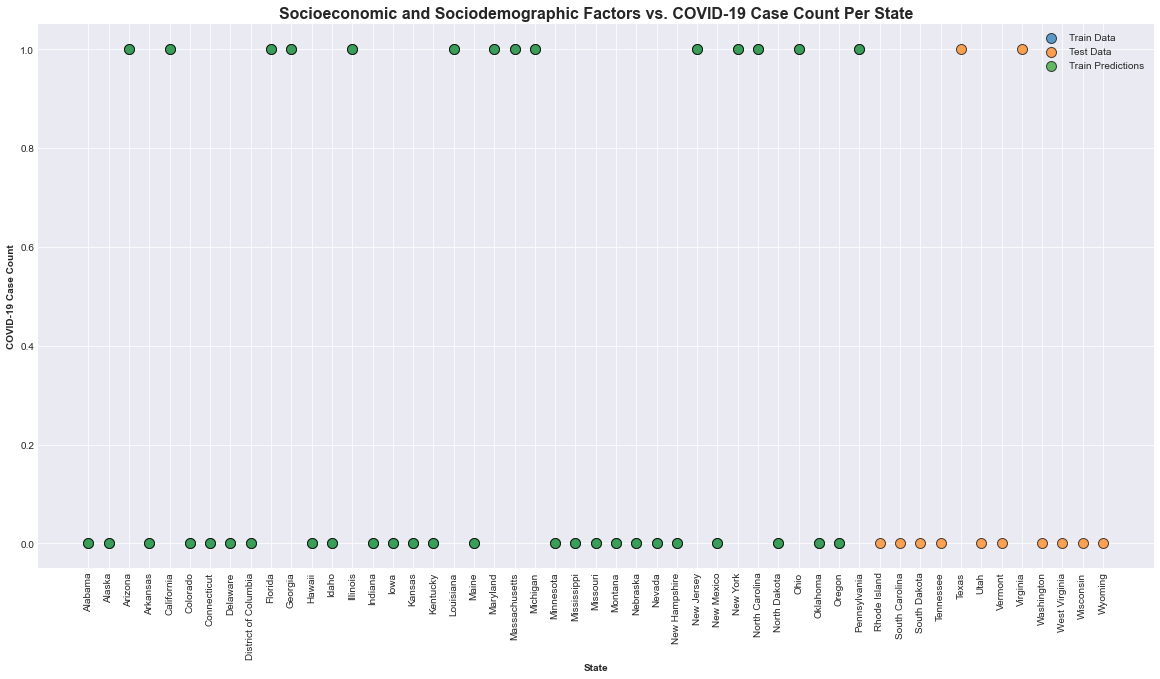

In [71]:
rcParams['figure.figsize'] = 20, 10

plt.figure()

plt.scatter(x = train['State'], y = train['Cases_Avg'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.scatter(x = test['State'], y = test['Cases_Avg'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.scatter(x = train['State'], y = train_predictions, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.title('Socioeconomic and Sociodemographic Factors vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Train Data', 'Test Data', 'Train Predictions'])

plt.xticks(rotation = 90)
plt.show();

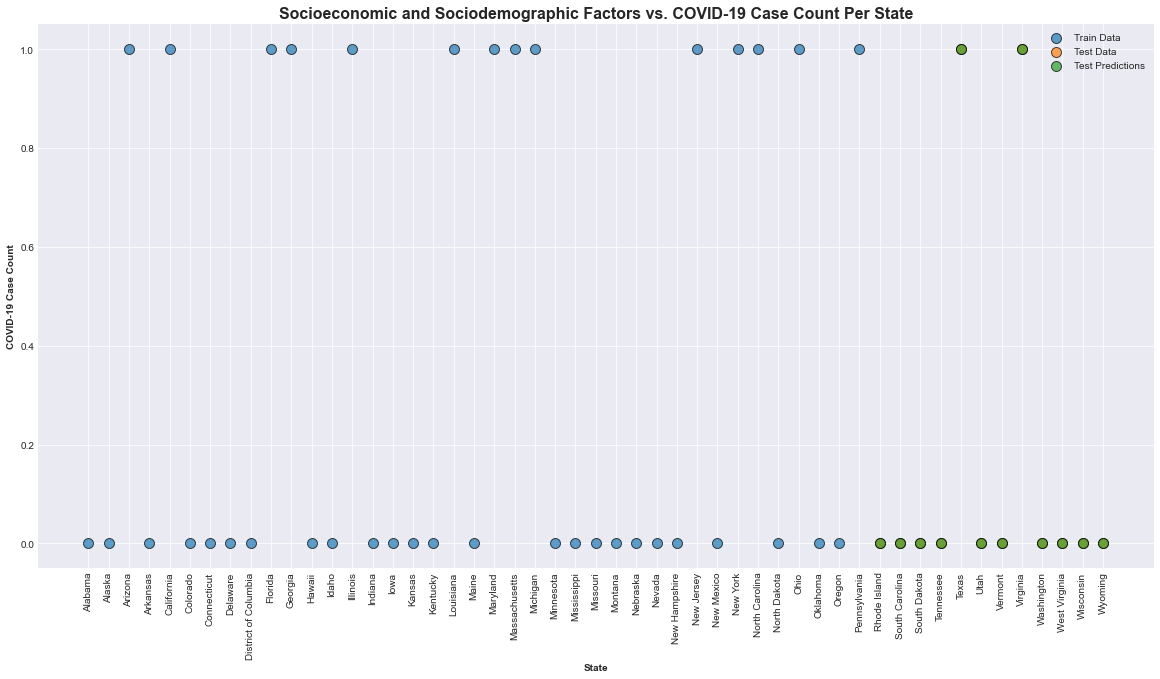

In [72]:
rcParams['figure.figsize'] = 20, 10

plt.figure()

plt.scatter(x = train['State'], y = train['Cases_Avg'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.scatter(x = test['State'], y = test['Cases_Avg'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.scatter(x = test['State'], y = test_predictions, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.title('Socioeconomic and Sociodemographic Factors vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Train Data', 'Test Data', 'Test Predictions'])

plt.xticks(rotation = 90)
plt.show();